## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [63]:
# Start solution here
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [124]:
# Read data
pd.set_option('display.max_columns', 100)
df = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
print(df.shape)

(1925, 231)


In [3]:
# EDA
# Patient Demographic Information
# Number of patients
print(df.PATIENT_VISIT_IDENTIFIER.unique().size)
print(df.iloc[:, 0: 4].head())

385
   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER
0                         0            1          60th       0
1                         0            1          60th       0
2                         0            1          60th       0
3                         0            1          60th       0
4                         0            1          60th       0


In [4]:
# Patient previous grouped diseases
print(df.iloc[:, 4:13].head())

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER  
0                0.0    1.0  
1                0.0    1.0  
2                0.0    1.0  
3                0.0    1.0  
4                0.0    1.0  


In [5]:
# Blood results
print(df.iloc[:, 13:-8].head())

   ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  ALBUMIN_DIFF  \
0             NaN           NaN          NaN          NaN           NaN   
1             NaN           NaN          NaN          NaN           NaN   
2        0.605263      0.605263     0.605263     0.605263          -1.0   
3             NaN           NaN          NaN          NaN           NaN   
4        0.000000      0.000000     0.000000     0.000000          -1.0   

   BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  \
0                 NaN               NaN              NaN              NaN   
1                 NaN               NaN              NaN              NaN   
2           -1.000000         -1.000000        -1.000000        -1.000000   
3                 NaN               NaN              NaN              NaN   
4           -0.871658         -0.871658        -0.871658        -0.871658   

   BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  \
0             

In [6]:
# Vital signs
print(df.iloc[:, -8:-2].head())

   BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
0                         -1.000000                        -1.000000   
1                         -1.000000                        -1.000000   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                         -0.389967                         0.407558   

   HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
0            -1.000000                  -1.000000             -1.000000   
1            -1.000000                  -1.000000             -1.000000   
2                  NaN                        NaN                   NaN   
3                  NaN                        NaN             -1.000000   
4            -0.230462                   0.096774             -0.242282   

   OXYGEN_SATURATION_DIFF_REL  
0                   -1.000000  
1                   -1.000000  
2                   

In [7]:
# WINDOW and ICU
print(df.iloc[:, -2:].head())

     WINDOW  ICU
0       0-2    0
1       2-4    0
2       4-6    0
3      6-12    0
4  ABOVE_12    1


In [8]:
# Explore missing values
pd.set_option('display.max_rows', 232)
print("Percentage of missing values for each column:")
print(1 - df.count()/df.shape[0])

Percentage of missing values for each column:
PATIENT_VISIT_IDENTIFIER            0.000000
AGE_ABOVE65                         0.000000
AGE_PERCENTIL                       0.000000
GENDER                              0.000000
DISEASE GROUPING 1                  0.002597
DISEASE GROUPING 2                  0.002597
DISEASE GROUPING 3                  0.002597
DISEASE GROUPING 4                  0.002597
DISEASE GROUPING 5                  0.002597
DISEASE GROUPING 6                  0.002597
HTN                                 0.002597
IMMUNOCOMPROMISED                   0.002597
OTHER                               0.002597
ALBUMIN_MEDIAN                      0.573506
ALBUMIN_MEAN                        0.573506
ALBUMIN_MIN                         0.573506
ALBUMIN_MAX                         0.573506
ALBUMIN_DIFF                        0.573506
BE_ARTERIAL_MEDIAN                  0.573506
BE_ARTERIAL_MEAN                    0.573506
BE_ARTERIAL_MIN                     0.573506
BE_ARTERI

In [9]:
# Fill missing value
pd.options.mode.chained_assignment = None
df1 = pd.DataFrame()
for i in df.PATIENT_VISIT_IDENTIFIER.unique():
  patient = df[df.PATIENT_VISIT_IDENTIFIER == i]
  patient.fillna(method='ffill', inplace = True)
  patient.fillna(method='bfill', inplace = True)
  df1 = df1.append(patient)
df1.isna().all() # Check remaining null value

PATIENT_VISIT_IDENTIFIER            False
AGE_ABOVE65                         False
AGE_PERCENTIL                       False
GENDER                              False
DISEASE GROUPING 1                  False
DISEASE GROUPING 2                  False
DISEASE GROUPING 3                  False
DISEASE GROUPING 4                  False
DISEASE GROUPING 5                  False
DISEASE GROUPING 6                  False
HTN                                 False
IMMUNOCOMPROMISED                   False
OTHER                               False
ALBUMIN_MEDIAN                      False
ALBUMIN_MEAN                        False
ALBUMIN_MIN                         False
ALBUMIN_MAX                         False
ALBUMIN_DIFF                        False
BE_ARTERIAL_MEDIAN                  False
BE_ARTERIAL_MEAN                    False
BE_ARTERIAL_MIN                     False
BE_ARTERIAL_MAX                     False
BE_ARTERIAL_DIFF                    False
BE_VENOUS_MEDIAN                  

In [10]:
# Get information on each patient's ICU status
ICU_result = (df1.groupby("PATIENT_VISIT_IDENTIFIER").sum().ICU > 0).reset_index() * 1 # convert ICU into 1 or 0
ICU_result.set_index("PATIENT_VISIT_IDENTIFIER", inplace = True) # Set index "PATIENT_VISIT_IDENTIFIER" to facilitate joining with df
print(ICU_result)

                          ICU
PATIENT_VISIT_IDENTIFIER     
0                           1
1                           1
2                           1
3                           0
4                           0
...                       ...
380                         1
381                         0
382                         1
383                         0
384                         0

[385 rows x 1 columns]


In [11]:
# Join ICU_admitted with df
df2 = df1.join(ICU_result, on = 'PATIENT_VISIT_IDENTIFIER', rsuffix ='_result')

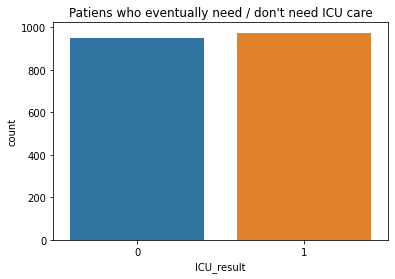

In [53]:
# Explore the proportion of patients who need and don't need ICU care
plt.figure()
plt.title("Patiens who eventually need / don't need ICU care")
sb.countplot(x = "ICU_result", data = df2)
plt.show()

In [12]:
# Drop the data where the patient has already be sent to ICU
df3 = df2[df2.ICU != 1]

print(df3.head())

    PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                          0            1          60th       0   
1                          0            1          60th       0   
2                          0            1          60th       0   
3                          0            1          60th       0   
10                         2            0          10th       0   

    DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
10                 0.0                 0.0                 0.0   

    DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                  0.0                 1.0                 1.0  0.0   
1                  0.0                 1.0                

In [13]:
df3.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1924
Data columns (total 232 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   PATIENT_VISIT_IDENTIFIER          int64  
 1   AGE_ABOVE65                       int64  
 2   AGE_PERCENTIL                     object 
 3   GENDER                            int64  
 4   DISEASE GROUPING 1                float64
 5   DISEASE GROUPING 2                float64
 6   DISEASE GROUPING 3                float64
 7   DISEASE GROUPING 4                float64
 8   DISEASE GROUPING 5                float64
 9   DISEASE GROUPING 6                float64
 10  HTN                               float64
 11  IMMUNOCOMPROMISED                 float64
 12  OTHER                             float64
 13  ALBUMIN_MEDIAN                    float64
 14  ALBUMIN_MEAN                      float64
 15  ALBUMIN_MIN                       float64
 16  ALBUMIN_MAX                       float64

In [14]:
# To build classification model, all variables need to be in int or float
# Convert AGE_PERCENTIL into int
df3["AGE_PERCENTIL"] = df3["AGE_PERCENTIL"].apply(lambda x: int(x.replace("th", "").strip("Above ")))

In [15]:
# Check again df3.info()
df3.info(verbose = True)
# As we can see, AGE_PERCENTIL is in int right now. All variables except for WINDOW is ready for classification analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1924
Data columns (total 232 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   PATIENT_VISIT_IDENTIFIER          int64  
 1   AGE_ABOVE65                       int64  
 2   AGE_PERCENTIL                     int64  
 3   GENDER                            int64  
 4   DISEASE GROUPING 1                float64
 5   DISEASE GROUPING 2                float64
 6   DISEASE GROUPING 3                float64
 7   DISEASE GROUPING 4                float64
 8   DISEASE GROUPING 5                float64
 9   DISEASE GROUPING 6                float64
 10  HTN                               float64
 11  IMMUNOCOMPROMISED                 float64
 12  OTHER                             float64
 13  ALBUMIN_MEDIAN                    float64
 14  ALBUMIN_MEAN                      float64
 15  ALBUMIN_MIN                       float64
 16  ALBUMIN_MAX                       float64

In [16]:
# Set dummy variables
df4 = pd.get_dummies(df3, columns = ["AGE_PERCENTIL", "WINDOW"])
df4.dropna(inplace = True)
df4.drop(columns = ["PATIENT_VISIT_IDENTIFIER", "ICU"], inplace = True) # ICU can be dropped because I already add ICU_result (which indicate the 
#ultimate ICU result to the dataframe)

In [135]:
# Predict if a patient need ICU care
# Split the data
y = df4["ICU_result"]
X = df4.drop(columns = ["ICU_result"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020, stratify = y)

In [18]:
# Use Baseline Classification
dummy_classifier = DummyClassifier(strategy = "most_frequent")
dummy_classifier.fit(X_train, y_train)
baseline_accuracy = dummy_classifier.score(X_test, y_test)
print("Accuracy of baseline classification", baseline_accuracy)

Accuracy of baseline classification 0.6745843230403801


In [55]:
# Use Desicion Tree Classifier
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 2020)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
acc_dt = metrics.accuracy_score(y_test, pred_dt)
print("Accuracy of the decision tree model", acc_dt)

Accuracy of the decision tree model 0.9453681710213777


In [73]:
# Recall score of dt
recall_dt = metrics.recall_score(y_test, pred_dt)
print("Recall score of the decision tree model", recall_dt)

Recall score of the decision tree model 0.8686131386861314


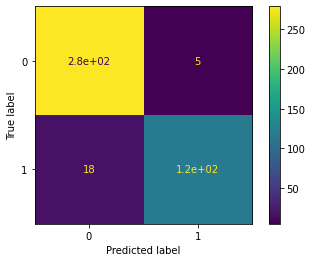

In [56]:
# Plot the confusion matrix for dt
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

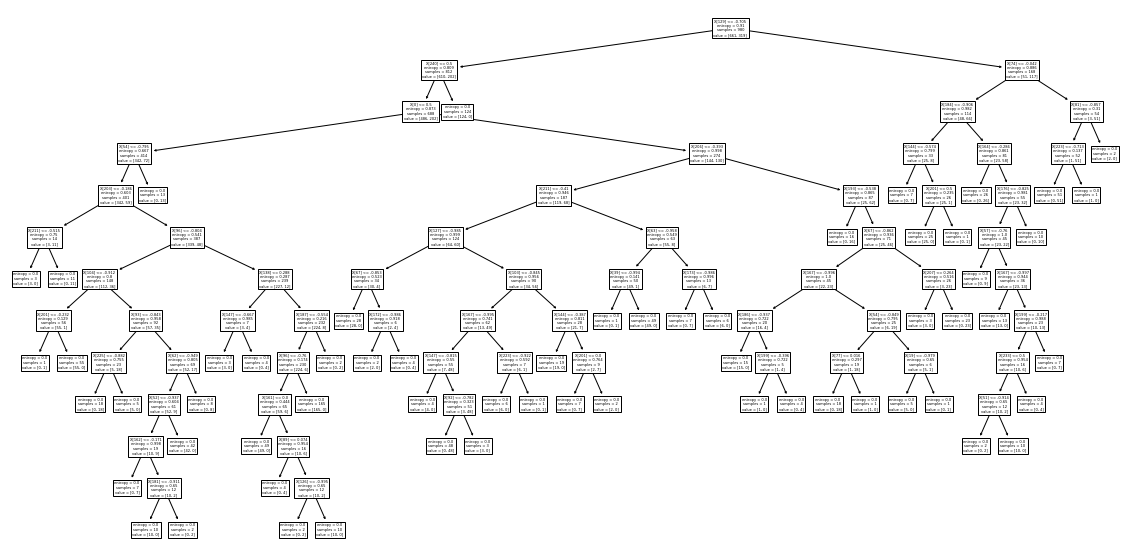

In [131]:
# Plot Decision Tree
plt.figure(2, figsize = (20, 10))
dtplot = tree.plot_tree(dt)
plt.savefig("dtplot.png")
plt.show()

In [36]:
# Feature Importances of dt model
impFeatures_dt = dt.feature_importances_
imp_dt = pd.DataFrame(zip(X_train.columns, impFeatures_dt), columns = ["Feature", "Importance"])
imp_dt.sort_values(by = "Importance", ascending = False, inplace = True)
print("Feature Importances of dt model:")
print(imp_dt.head(20))

Feature Importances of dt model:
                         Feature  Importance
129                      PCR_MAX    0.096536
240              WINDOW_ABOVE_12    0.063129
0                    AGE_ABOVE65    0.057625
54                 CREATININ_MAX    0.050039
144                PLATELETS_MAX    0.040458
167                     TGO_MEAN    0.037518
96             LINFOCITOS_MEDIAN    0.037466
211               HEART_RATE_MAX    0.032320
104             NEUTROPHILES_MAX    0.025842
203  BLOODPRESSURE_DIASTOLIC_MIN    0.024494
206         RESPIRATORY_RATE_MIN    0.023951
147               POTASSIUM_MEAN    0.023183
67                  GLUCOSE_MEAN    0.022768
201           TEMPERATURE_MEDIAN    0.022678
74               HEMATOCRITE_MAX    0.022561
127                     PCR_MEAN    0.022486
62                      GGT_MEAN    0.021025
52                CREATININ_MEAN    0.020022
103             NEUTROPHILES_MIN    0.019541
225         TEMPERATURE_DIFF_REL    0.019476


In [38]:
# Emsemble
# Bagging Classifier
dt2 = DecisionTreeClassifier()
model_bagging = BaggingClassifier(base_estimator = dt2, n_estimators = 20, random_state = 2020)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = metrics.accuracy_score(y_test, pred_bagging)
print("Accuracy of the bagging ensemble is", acc_bagging)

Accuracy of the bagging ensemble is 0.9619952494061758


In [74]:
# Recall score of bagging
recall_bagging = metrics.recall_score(y_test, pred_bagging)
print("Recall score of the bagging classification model", recall_bagging)

Recall score of the bagging classification model 0.8978102189781022


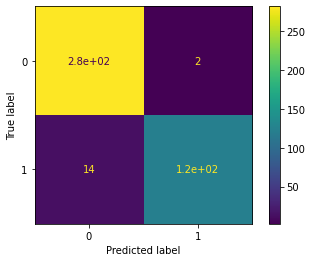

In [39]:
# Plot the confusion matrix for Bagging Classifier
metrics.plot_confusion_matrix(model_bagging, X_test, y_test)
plt.show()

In [59]:
# Random Forest Model
model_rf = RandomForestClassifier(n_estimators = 200, max_features = 7, random_state = 2020)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, predict_rf)
print("Accuracy of the random forest is", str(acc_rf))

Accuracy of the random forest is 0.9667458432304038


In [75]:
# Recall score of rf
recall_rf = metrics.recall_score(y_test, predict_rf)
print("Recall score of the random forest model", recall_rf)

Recall score of the random forest model 0.9051094890510949


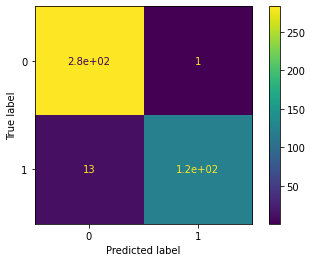

In [60]:
# Plot the confusion matrix for Random Forest
metrics.plot_confusion_matrix(model_rf, X_test, y_test)
plt.show()

In [61]:
# Feature Importances of rf model
impFeatures_rf = model_rf.feature_importances_
imp_rf = pd.DataFrame(zip(X_train.columns, impFeatures_rf), columns = ["Feature", "Importance"])
imp_rf.sort_values(by = "Importance", ascending = False, inplace = True)
print("Feature Importances of rf model:")
print(imp_rf.head(20))

Feature Importances of rf model:
                     Feature  Importance
126               PCR_MEDIAN    0.023975
129                  PCR_MAX    0.022806
127                 PCR_MEAN    0.021665
128                  PCR_MIN    0.019500
206     RESPIRATORY_RATE_MIN    0.017382
194    RESPIRATORY_RATE_MEAN    0.015936
181              UREA_MEDIAN    0.015180
182                UREA_MEAN    0.014702
184                 UREA_MAX    0.014260
98            LINFOCITOS_MIN    0.013967
200  RESPIRATORY_RATE_MEDIAN    0.013031
52            CREATININ_MEAN    0.012831
164               SODIUM_MAX    0.012612
51          CREATININ_MEDIAN    0.012242
99            LINFOCITOS_MAX    0.012130
96         LINFOCITOS_MEDIAN    0.012036
163               SODIUM_MIN    0.012000
97           LINFOCITOS_MEAN    0.011906
53             CREATININ_MIN    0.011702
68               GLUCOSE_MIN    0.011472


In [44]:
# AdaBoost Classification
dt3 = DecisionTreeClassifier()
model_ada = AdaBoostClassifier(base_estimator = dt3, n_estimators = 200, random_state = 2020, learning_rate = 0.05)
model_ada.fit(X_train, y_train)
predict_ada = model_ada.predict(X_test)
acc_ada = metrics.accuracy_score(y_test, predict_ada)
print("Accuracy of the AdaBoost model is", acc_ada)

Accuracy of the AdaBoost model is 0.9382422802850356


In [76]:
# Recall score of AdaBoost
recall_ada = metrics.recall_score(y_test, predict_ada)
print("Recall score of the Adaboost Classification model", recall_ada)

Recall score of the Adaboost Classification model 0.8540145985401459


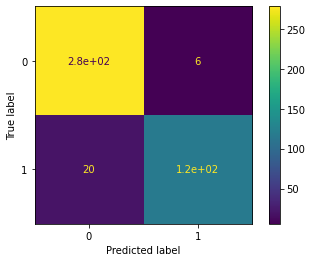

In [45]:
# Plot the confusion matrix for AdaBoost Classification
metrics.plot_confusion_matrix(model_ada, X_test, y_test)
plt.show()

In [46]:
# Feature Importances of AdaBoost model
impFeatures_ada = model_ada.feature_importances_
imp_ada = pd.DataFrame(zip(X_train.columns, impFeatures_ada), columns = ["Feature", "Importance"])
imp_ada.sort_values(by = "Importance", ascending = False, inplace = True)
print("Feature Importances of AdaBoost model:")
print(imp_ada.head(20))

Feature Importances of AdaBoost model:
                         Feature  Importance
126                   PCR_MEDIAN    0.129649
54                 CREATININ_MAX    0.076089
235             AGE_PERCENTIL_90    0.076023
99                LINFOCITOS_MAX    0.046686
162                  SODIUM_MEAN    0.040234
81                    INR_MEDIAN    0.036724
144                PLATELETS_MAX    0.033103
101          NEUTROPHILES_MEDIAN    0.027404
67                  GLUCOSE_MEAN    0.027199
184                     UREA_MAX    0.026881
147               POTASSIUM_MEAN    0.025628
217              HEART_RATE_DIFF    0.023620
203  BLOODPRESSURE_DIASTOLIC_MIN    0.021225
204   BLOODPRESSURE_SISTOLIC_MIN    0.019961
231             AGE_PERCENTIL_50    0.018655
196       OXYGEN_SATURATION_MEAN    0.018557
136             PH_VENOUS_MEDIAN    0.016591
200      RESPIRATORY_RATE_MEDIAN    0.016539
208        OXYGEN_SATURATION_MIN    0.016019
91             LEUKOCYTES_MEDIAN    0.015976


In [48]:
# Voting Ensemble
rfClf = RandomForestClassifier(n_estimators = 200)
dtClf = DecisionTreeClassifier()
svmClf = SVC(probability = True)
clf = VotingClassifier(estimators = [("rf", rfClf), ("dt", dtClf), ("svm", svmClf)], voting = "soft")
clf.fit(X_train, y_train)
predict_clf = clf.predict(X_test)
acc_clf = metrics.accuracy_score(y_test, predict_clf)
print("Accuracy of the voting classifier is", acc_clf)

Accuracy of the voting classifier is 0.9667458432304038


In [77]:
# Recall score of Voting Ensemble
recall_clf = metrics.recall_score(y_test, predict_clf)
print("Recall score of the Voting Classification model", recall_clf)

Recall score of the Voting Classification model 0.8978102189781022


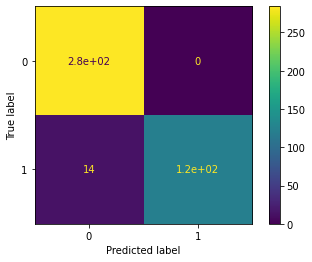

In [49]:
# Plot the confusion matrix for Voting Ensemble
metrics.plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [79]:
# Compare models
models = ["Decision Tree", "Bagging", "Random Forest", "AdaBoost Classifier", "Voting Classifier"]
accuracy = [acc_dt, acc_bagging, acc_rf, acc_ada, acc_clf]
recall_score = [recall_dt, recall_bagging, recall_rf, recall_ada, recall_clf]
df5 = pd.DataFrame({"Models": models, "Accuracy": accuracy, "Recall Score": recall_score}).sort_values(by = "Accuracy", ascending = False)
print(df5)
#print("The best model is Voting Classifier Forest with accuracy score", round(acc_clf, 4))

                Models  Accuracy  Recall Score
2        Random Forest  0.966746      0.905109
4    Voting Classifier  0.966746      0.897810
1              Bagging  0.961995      0.897810
0        Decision Tree  0.945368      0.868613
3  AdaBoost Classifier  0.938242      0.854015


In [68]:
# Hyperparameter Tuning using Randomized Grid Search Cross Validation

# Create a paramter grid

n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [138]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=2020, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [139]:
# The optimal hyperparameters
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

Accuracy of the new model is 0.9667458432304038
Recall score of the new model is 0.9051094890510949


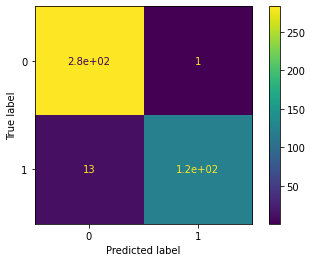

In [140]:
# Evaluate the optimal model
optimalModel = rf_random.best_estimator_
predict_rf_2 = optimalModel.predict(X_test)
acc_rf_2 = metrics.accuracy_score(y_test, predict_rf_2)
recall_rf_2 = metrics.recall_score(y_test, predict_rf_2)
print("Accuracy of the new model is", str(acc_rf_2))
print("Recall score of the new model is", recall_rf_2)
metrics.plot_confusion_matrix(optimalModel, X_test, y_test)
plt.show()

In [112]:
# Use the random forest model to apply on different WINDOW
df6 = df3.dropna() # drop any missing value if exists
df6.drop(columns = ["PATIENT_VISIT_IDENTIFIER", "ICU"], inplace = True) 
# As in previous, the column is dropped because they are unnecessary
df_firstWindow = df6[df6.WINDOW == "0-2"]
df_firstWindow.drop(columns = ["WINDOW"], inplace = True)
df_firstWindow = pd.get_dummies(df_firstWindow, columns = ["AGE_PERCENTIL"])

df_firstTwoWindows = df6[(df6.WINDOW == "0-2") | (df6.WINDOW == "2-4")]
df_firstTwoWindows.drop(columns = ["WINDOW"], inplace = True)
df_firstTwoWindows = pd.get_dummies(df_firstTwoWindows, columns = ["AGE_PERCENTIL"])

df_firstThreeWindows = df6[(df6.WINDOW == "0-2") | (df6.WINDOW == "2-4") | (df6.WINDOW == "4-6")]
df_firstThreeWindows.drop(columns = ["WINDOW"], inplace = True)
df_firstThreeWindows = pd.get_dummies(df_firstThreeWindows, columns = ["AGE_PERCENTIL"])

df_firstFourWindows = df6[(df6.WINDOW == "0-2") | (df6.WINDOW == "2-4") | (df6.WINDOW == "4-6") | (df6.WINDOW == "6-12")]
df_firstFourWindows.drop(columns = ["WINDOW"], inplace = True)
df_firstFourWindows = pd.get_dummies(df_firstFourWindows, columns = ["AGE_PERCENTIL"])

In [141]:
# Build function that make predict on each WINDOW's data with optimalModel
def Estimator(df_sample):
  y = df_sample["ICU_result"]
  X = df_sample.drop(columns = ["ICU_result"])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020, stratify = y)
  optimalModel.fit(X_train, y_train)
  y_predict = optimalModel.predict(X_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_predict))
  print("Recall score:", metrics.recall_score(y_test, y_predict))
  metrics.plot_confusion_matrix(optimalModel, X_test, y_test)
  plt.show()
  return metrics.accuracy_score(y_test, y_predict)

Accuracy: 0.6886792452830188
Recall score: 0.6122448979591837


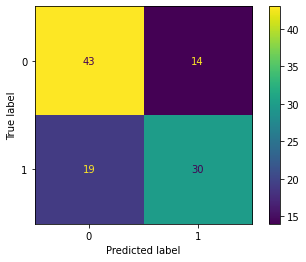

In [142]:
# Make prediction on df_firstWindow
acc_first = Estimator(df_firstWindow)

Accuracy: 0.9458128078817734
Recall score: 0.9325842696629213


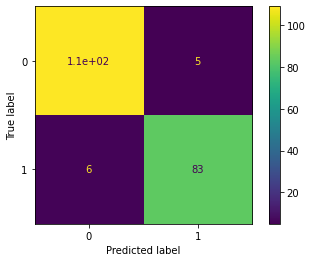

In [143]:
# Make prediction on df_firstTwoWindows
acc_firstTwo = Estimator(df_firstTwoWindows)

Accuracy: 0.9409722222222222
Recall score: 0.9067796610169492


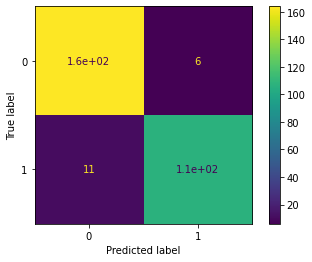

In [144]:
# Make prediction on df_firstThreeWindows
acc_firstThree = Estimator(df_firstThreeWindows)

Accuracy: 0.978021978021978
Recall score: 0.9416058394160584


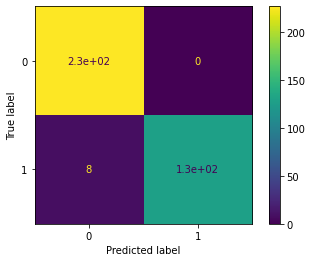

In [145]:
# Make prediction on df_firstFourWindows
acc_firstFour = Estimator(df_firstFourWindows)

<BarContainer object of 4 artists>

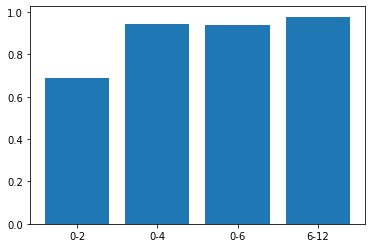

In [146]:
df8 = pd.DataFrame({"Window Period": ["0-2", "0-4", "0-6", "6-12"], "Accuracy of Model": [acc_first, acc_firstTwo, acc_firstThree, acc_firstFour]})
df8
plt.bar(df8["Window Period"], df8["Accuracy of Model"])